# Analysis of AMEO Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [3]:
#Importing the data and dislaying the head, shape, descriptions, etc.
df = pd.read_excel('data.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [5]:
df.shape

(3998, 39)

In [6]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [9]:
df.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [10]:
df = df.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Datatypes Conversion

#### 1. DOL - Date of Leaving.
The survey was conducted back in 2015 and therefore making an assumption that the respondents who responded as **present** for DOL actually left the company within 2015 only. So, we will replace **present** value in DOL with 2024-02-17.

Then we convert the datetype of DOJ and DOL to datetime.

In [11]:
df['DOL'].replace('present','2015-12-31', inplace = True)
df['DOL'] = pd.to_datetime(df['DOL'])
df['DOJ'] = pd.to_datetime(df['DOJ'])
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [12]:
categorical = ['Designation','JobCity', 'Gender','10board','12board','CollegeTier','Degree',
              'Specialization','CollegeCityTier','CollegeState']
for cat in categorical:
    df[cat] = df[cat].astype('category')

In [13]:
df.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                    category
JobCity                        category
Gender                         category
DOB                      datetime64[ns]
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
CollegeTier                    category
Degree                         category
Specialization                 category
collegeGPA                      float64
CollegeCityTier                category
CollegeState                   category
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


In [14]:
#### 2. Checking if the `DOL (Date of leaving)` is actually greater than `DOJ (Date of joining)`.


dates = df[(df['DOL'] < df['DOJ'])].shape[0]
print(f'DOL is earlier than DOJ for {dates} observations.')
print(df.shape)

DOL is earlier than DOJ for 40 observations.
(3998, 35)


These observations might be typos and hence we will drop those 40 rows.

In [15]:
df = df.drop(df[~(df['DOL'] > df['DOJ'])].index)
print(df.shape)

(3943, 35)


In [16]:
#### 3. Making the entries for `Gender` column more descriptive
df['Gender'].replace({'f':'Female','m':'Male'}, inplace = True)
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [17]:
#### 4. Validating if the results are in percentages and not in CGPA or otherwise.
print((df['10percentage'] <=10).sum())
print((df['12percentage'] <=10).sum())
print((df['collegeGPA'] <=10).sum())

0
0
12


`10percentage` and `12percentage` are fine but `collegeGPA` has 12 obvservations which need to be deal with.

In [18]:
df.loc[df['collegeGPA']<=10,'collegeGPA'].index

Int64Index([7, 138, 788, 1419, 1439, 1767, 2151, 2229, 2293, 2662, 2691, 3308], dtype='int64')

In [19]:
df.loc[df['collegeGPA']<=10,'collegeGPA'] = (df.loc[df['collegeGPA']<=10,'collegeGPA']/10)*100
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [20]:
#### 5. Validating if there exist 0 or -1 in the data
print((df==0).sum()[(df==0).sum() > 0])

10board             349
12board             358
CollegeCityTier    2761
GraduationYear        1
dtype: int64


In [21]:
(df==-1).sum()[(df==-1).sum()>0]/len(df)*100

JobCity                  11.361907
Domain                    6.137459
ComputerProgramming      21.836165
ElectronicsAndSemicon    71.392341
ComputerScience          77.605884
MechanicalEngg           94.040071
ElectricalEngg           96.094344
TelecomEngg              90.565559
CivilEngg                98.934821
dtype: float64

**According to the description of the columns:**

1. 10board
2. 12board
3. GraduationYear
4. JobCity
5. Domain

**The above columns cannot have 0 or -1 as their inputs and hence they should be considered as null values and therefore imputed**

1. ElectronicsAndSemicon  71.392341
2. ComputerScience        77.605884
3. MechanicalEngg         94.040071
4. ElectricalEngg         96.094344
5. TelecomEngg            90.565559
6. CivilEngg              98.934821          

In [22]:
df = df.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,525,0.635979,445,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,...,780,0.960603,-1,466,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,...,370,0.450877,395,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,...,625,0.974396,615,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,1991-02-27,78.0,cbse,2008,...,465,0.124502,-1,233,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [23]:
df['10board'] = df['10board'].astype(str)
df['12board'] = df['12board'].astype(str)
df['JobCity'] = df['JobCity'].astype(str)

In [24]:
df['10board'] = df['10board'].replace({'0':np.nan})
df['12board'] = df['12board'].replace({'0':np.nan})
df['GraduationYear'] = df['GraduationYear'].replace({0:np.nan})
df['JobCity'] = df['JobCity'].replace({'-1':np.nan})
df['Domain'] = df['Domain'].replace({-1:np.nan})
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].replace({-1:0})
df['ComputerScience'] = df['ComputerScience'].replace({-1:0})
df['ComputerProgramming'] = df['ComputerProgramming'].replace({-1:np.nan})

In [25]:
df['10board'] = df['10board'].astype('category')
df['12board'] = df['12board'].astype('category')
df['JobCity'] = df['JobCity'].astype('category')

In [26]:
df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,1990-02-19,84.30,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,1989-10-04,85.40,cbse,2007,...,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,1992-08-03,85.00,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,1989-12-05,85.60,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,1991-02-27,78.00,cbse,2008,...,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,800000,2014-04-01,2015-04-01,manager,Rajkot,Male,1990-06-22,73.00,NaN,2008,...,525,0.938588,NaN,0,0,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,280000,2011-10-01,2012-10-01,software engineer,New Delhi,Male,1987-04-15,52.09,cbse,2006,...,475,0.276047,345.0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,Male,1991-07-03,81.86,"bse,odisha",2008,...,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,Female,1992-03-20,78.72,state board,2010,...,320,0.744758,445.0,0,438,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


Imputing categorical columns with mode values for their respective columns.

In [90]:
df['10board'].fillna(df['10board'].mode()[0], inplace = True)
df['12board'].fillna(df['12board'].mode()[0], inplace = True)
df['GraduationYear'].fillna(df['GraduationYear'].mode()[0], inplace = True)
df['JobCity'].fillna(df['JobCity'].mode()[0], inplace = True)

df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Tenure
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,...,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,1308
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,...,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,851
2,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,1992-08-03,85.0,cbse,2010,...,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,578
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,...,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26,1644
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,...,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,365


Imputing the numerical columns with median values for their respective columns.

In [28]:
df['Domain'].fillna(df['Domain'].median(), inplace = True)
df['ComputerProgramming'].fillna(df['ComputerProgramming'].median(), inplace = True)
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,...,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,1991-02-27,78.0,cbse,2008,...,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [29]:
#### 6. Correcting string data in columns


def correct_string_data(data):
    '''
    Convert the textual categories to lower case
    and remove the leading or trailing spaces if any.

    '''
    df[data] = df[data].str.lower().str.strip()

In [30]:
textual_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

In [31]:
for col in textual_columns:
    print(f'Number of unique values in {col} with inconsistency : {df[col].nunique()}')

Number of unique values in Designation with inconsistency : 416
Number of unique values in JobCity with inconsistency : 337
Number of unique values in 10board with inconsistency : 274
Number of unique values in 12board with inconsistency : 339
Number of unique values in Specialization with inconsistency : 46
Number of unique values in CollegeState with inconsistency : 26


In [32]:
for col in textual_columns:
    correct_string_data(col)

In [33]:
for col in textual_columns:
    print(f'Number of unique values in {col} without inconsistency : {df[col].nunique()}')

Number of unique values in Designation without inconsistency : 416
Number of unique values in JobCity without inconsistency : 230
Number of unique values in 10board without inconsistency : 272
Number of unique values in 12board without inconsistency : 336
Number of unique values in Specialization without inconsistency : 46
Number of unique values in CollegeState without inconsistency : 26


**Since the number of categories are large enough to deal with, we keep the top 10 categories.**

### Collapsing Categories

Keeping only the top 10 frequent categories and classifying others as **other**.

In [34]:
def collapsing_categories(df, data):
    for Designation in df[data].unique():
        min_count = df[data].value_counts()[:10].min()
        if df[df[data] == Designation][data].value_counts()[0] < min_count:
            df.loc[df[data] == Designation, data] = 'other'

In [35]:
for cols in textual_columns:
    collapsing_categories(df, cols)

In [36]:
for cols in textual_columns:
    print('')
    print('Top 10 categories in:', cols)
    print('')
    print(df[cols].value_counts())
    print('')
    print('-'*100)


Top 10 categories in: Designation

other                         2259
software engineer              535
software developer             262
system engineer                202
programmer analyst             139
systems engineer               117
java software engineer         109
software test engineer         100
project engineer                76
technical support engineer      73
senior software engineer        71
Name: Designation, dtype: int64

----------------------------------------------------------------------------------------------------

Top 10 categories in: JobCity

bangalore    1109
other         807
noida         382
hyderabad     361
pune          322
chennai       310
gurgaon       212
new delhi     203
mumbai        119
kolkata       118
Name: JobCity, dtype: int64

----------------------------------------------------------------------------------------------------

Top 10 categories in: 10board

cbse                            1726
state board                     11

In [91]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Tenure
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,...,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,1308
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,...,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,851
2,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,1992-08-03,85.0,cbse,2010,...,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,578
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,...,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26,1644
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,...,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,365


### Feature Engineering

##### 1. Since the dataset was release in 2015, we add a age column by subtracting DOB year from 2015. This will add the age as of 2015.

In [38]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['Age'] = 2015 - df['DOB'].dt.year
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,...,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,...,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26
2,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,1992-08-03,85.0,cbse,2010,...,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,...,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,...,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24


In [39]:
#### 2. Adding a tenure column by subtracting the `DOL` from `DOJ`

delta = (df['DOL'] - df['DOJ'])
tenure = np.zeros(len(df))
for i, date in enumerate(delta):
    tenure[i] = round(date.days/365,2)
df['Tenure'] = tenure

In [40]:
#### 3. Dropping the rows where the graduationyear is greater than or equal to date of joining
len(df[(df['GraduationYear'] > df['DOJ'].dt.year)].index)

79

In [41]:
df = df.drop(df[(df['GraduationYear'] > df['DOJ'].dt.year)].index)

In [42]:
#### 4. Function to calculate CDF
def cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

## Univariate Analysis

### 1. Continuous Features

#### 1. Tenure

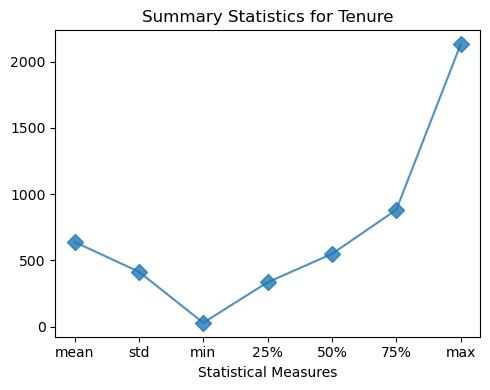

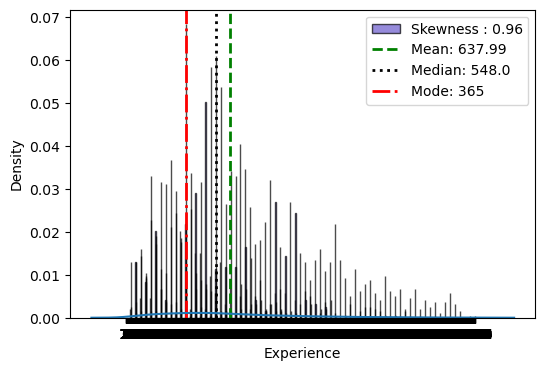

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


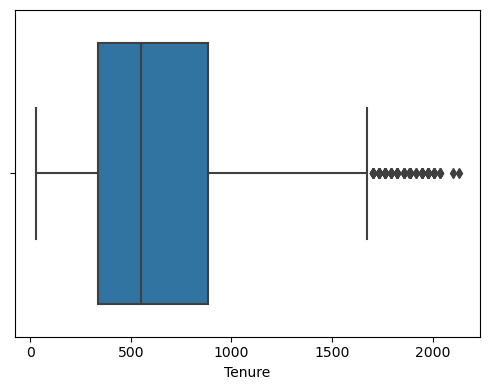

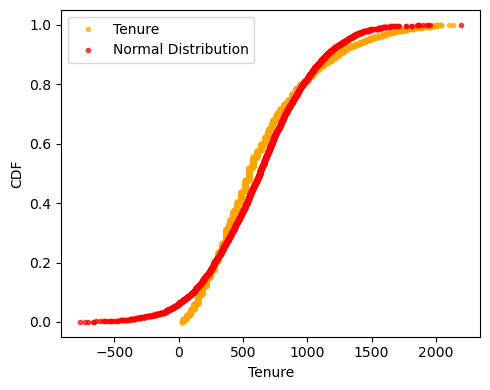

In [104]:
# Summary Plot

plt.figure(figsize=(5, 4))
df['Tenure'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Tenure')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize = (6,4))
plt.hist(df['Tenure'],
        ec = 'k',
        bins = np.arange(0, df['Tenure'].max()+0.5, 0.5),
        color = 'slateblue',
        alpha = 0.7,
        label = f"Skewness : {round(df['Tenure'].skew(),2)}",
        density = True)
plt.xticks(ticks = np.arange(0, df['Tenure'].max()+0.5, 0.5))
plt.xlabel('Experience')
plt.ylabel('Density')
plt.axvline(df['Tenure'].mean(), label = f"Mean: {round(df['Tenure'].mean(),2)}",
            linestyle = '--',
           color = 'green', linewidth = 2)
plt.axvline(df['Tenure'].median(), label = f"Median: {round(df['Tenure'].median(),2)}",
            linestyle = ':',
           color = 'k', linewidth = 2)
plt.axvline(df['Tenure'].mode()[0], label = f"Mode: {round(df['Tenure'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
sns.kdeplot(df['Tenure'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5, 4))
sns.boxplot(df['Tenure'])
plt.xlabel('Tenure')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5, 4))
x_tenure, y_tenure = cdf(df['Tenure'])
x_sample_tenure, y_sample_tenure = cdf(np.random.normal(df['Tenure'].mean(), df['Tenure'].std(), size = len(df['Tenure'])))
plt.plot(x_tenure, y_tenure, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_tenure, y_sample_tenure, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Tenure')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations


1. `Summary Plot`   - The range for experience is 4 years. 
2. `Histogram`  - The data is positively skewed i.e there exists larger number of respondents with low tenure, 50% data points are below 1.5 years, Average tenure is 1.5 years, The mean, median, and mode lie very close to each other and skewness (0.6) is close to that of a normal (0). 
3. `Box Plot` - There are few values with large tenure i.e outliers 
4. `CDF`  - The data is not normally distributed, We can say that tenure is not normally distributed. 



#### 2. Salary

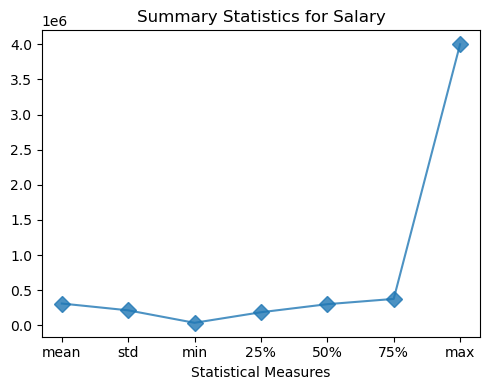

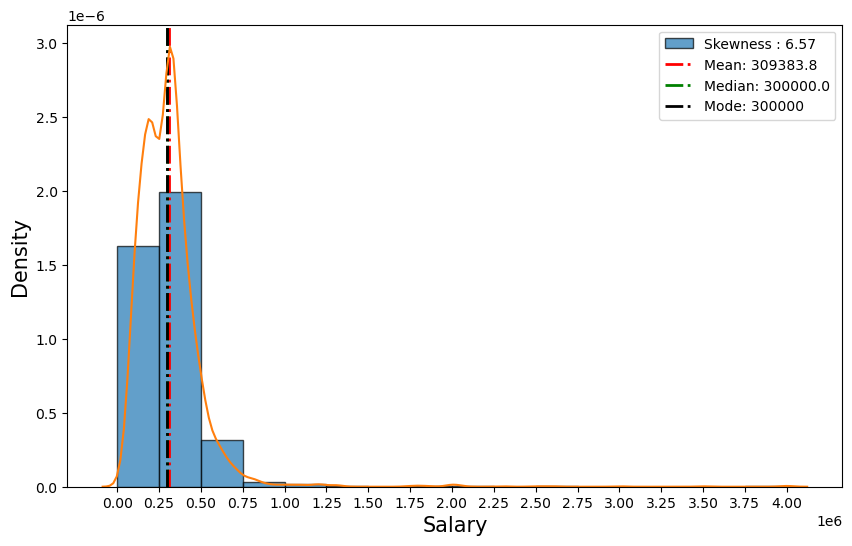

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


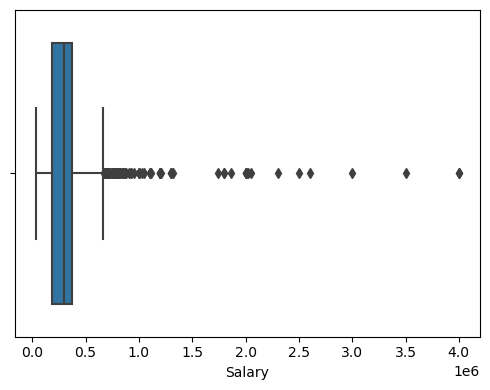

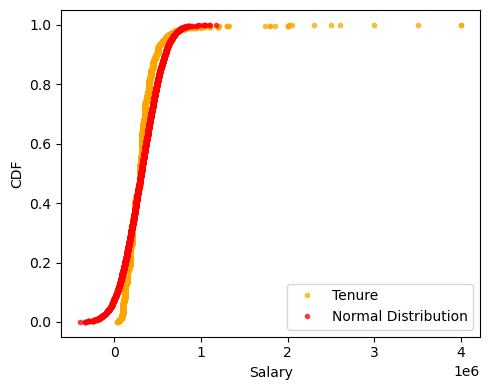

In [44]:
# Summary Plot

plt.figure(figsize=(5,4))
df['Salary'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Salary')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(0, df['Salary'].max()+250000, 250000)
plt.figure(figsize = (10,6))
plt.hist(df['Salary'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['Salary'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Salary', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['Salary'].mean(), label = f"Mean: {round(df['Salary'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['Salary'].median(), label = f"Median: {round(df['Salary'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['Salary'].mode()[0], label = f"Mode: {round(df['Salary'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['Salary'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df['Salary'])
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_salary, y_salary = cdf(df['Salary'])
x_sample_salary, y_sample_salary = \
cdf(np.random.normal(df['Salary'].mean(), df['Salary'].std(), size = len(df['Salary'])))
plt.plot(x_salary, y_salary, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_salary, y_sample_salary, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Salary')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations


1. `Summary Plot`  There is substantial variation in salary across the dataset.  
2. `Histogram`   The data exhibits significant positive skewness, with a skewness value around 6 (approximately), indicating a departure from a normal distribution. The measures of central tendency (mean, median, and mode) are approximately equal.  
3. `Box Plot`   There is a notable concentration of data points with high salaries, as depicted by the box plot.  
4. `CDF`   The cumulative distribution function (CDF) reveals a high degree of skewness in the data, with considerable deviation from a normal distribution pattern.  


#### 3. 10th Percentage

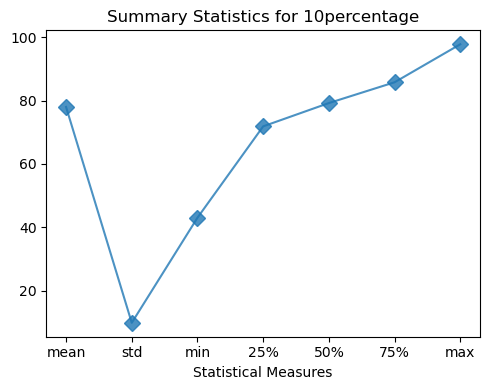

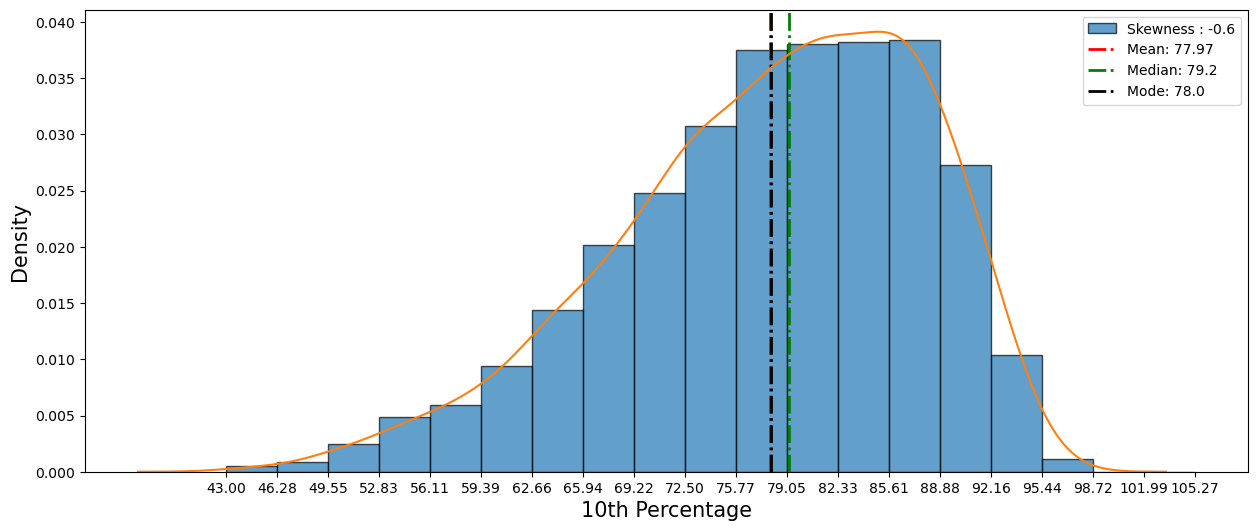

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


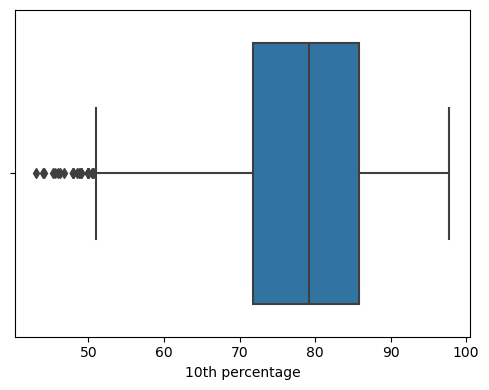

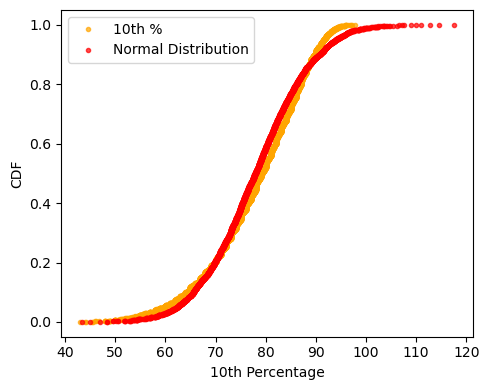

In [45]:
# Summary Plot

plt.figure(figsize=(5,4))
df['10percentage'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 10percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

#Histogram


bins = np.arange(df['10percentage'].min(), df['10percentage'].max()+df['10percentage'].std(),
                 df['10percentage'].std()/3)
plt.figure(figsize = (15,6))
plt.hist(df['10percentage'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['10percentage'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('10th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['10percentage'].mean(), label = f"Mean: {round(df['10percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['10percentage'].median(), label = f"Median: {round(df['10percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['10percentage'].mode()[0], label = f"Mode: {round(df['10percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['10percentage'])
plt.legend()
plt.show()

#Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df['10percentage'])
plt.xlabel('10th percentage')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_10, y_10 = cdf(df['10percentage'])
x_sample_10 , y_sample_10 = \
cdf(np.random.normal(df['10percentage'].mean(), df['10percentage'].std(), size = len(df['10percentage'])))
plt.plot(x_10, y_10, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = '10th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('10th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations

1. `Summary Plot`  Around 50% of students achieved scores of approximately 80% or less. 
2. `Histogram`  The histogram depicts a scarcity of students with low percentages, with the majority falling within the 75% to 90% range. The peak frequency occurs at 78%, and the average score hovers around 77%. 
3. `Box Plot`  The presence of a few extreme outliers is evident from the box plot. 
4. `CDF`  The data exhibits some skewness and does not conform to a normal distribution pattern. 



#### 4. 12th Percentage

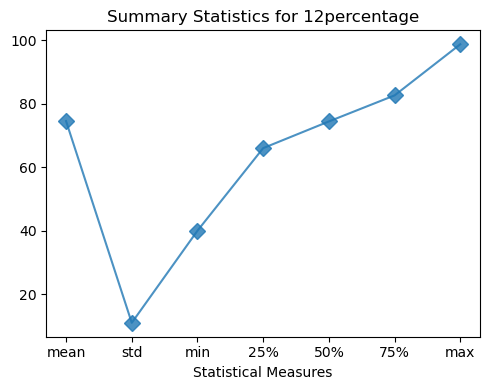

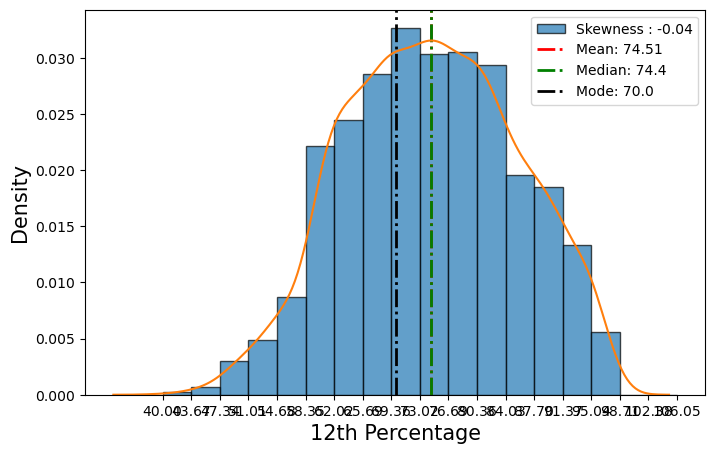

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


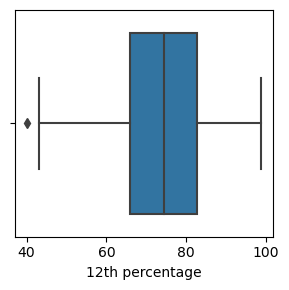

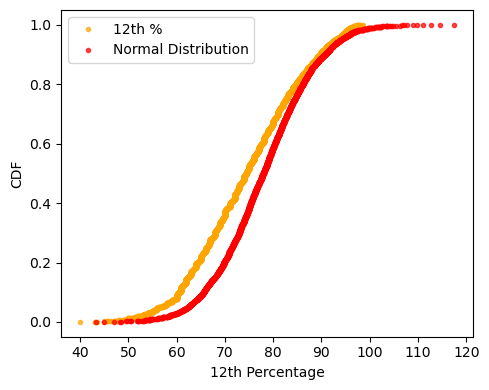

In [95]:
# Summary Plot

plt.figure(figsize=(5,4))
df['12percentage'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 12percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(df['12percentage'].min(), df['12percentage'].max()+df['12percentage'].std(),
                 df['12percentage'].std()/3)
plt.figure(figsize = (8,5))
plt.hist(df['12percentage'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['12percentage'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('12th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['12percentage'].mean(), label = f"Mean: {round(df['12percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['12percentage'].median(), label = f"Median: {round(df['12percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['12percentage'].mode()[0], label = f"Mode: {round(df['12percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['12percentage'])
plt.legend()
plt.show()

#Box Plot

plt.figure(figsize=(3,3))
sns.boxplot(df['12percentage'])
plt.xlabel('12th percentage')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_12, y_12 = cdf(df['12percentage'])
x_sample_12 , y_sample_12 = \
cdf(np.random.normal(df['12percentage'].mean(), df['12percentage'].std(), size = len(df['12percentage'])))
plt.plot(x_12, y_12, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = '12th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('12th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations


1. `Summary Plot`  Roughly half of the students achieved scores of approximately 78% or lower. 
2. `Histogram`  The histogram illustrates a scarcity of students with low percentages, with the majority scoring between 69% and 84%. The peak frequency occurs at 70%, and the average score is around 74%. 
3. `Box Plot`  The box plot indicates only one data point with an extremely low score. 
4. `CDF`  The data does not follow a normal distribution pattern. 



#### 5. CollegeGPA

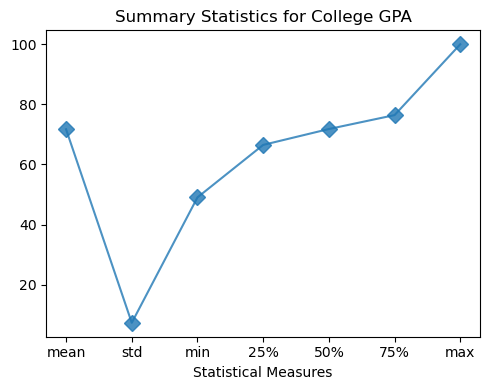

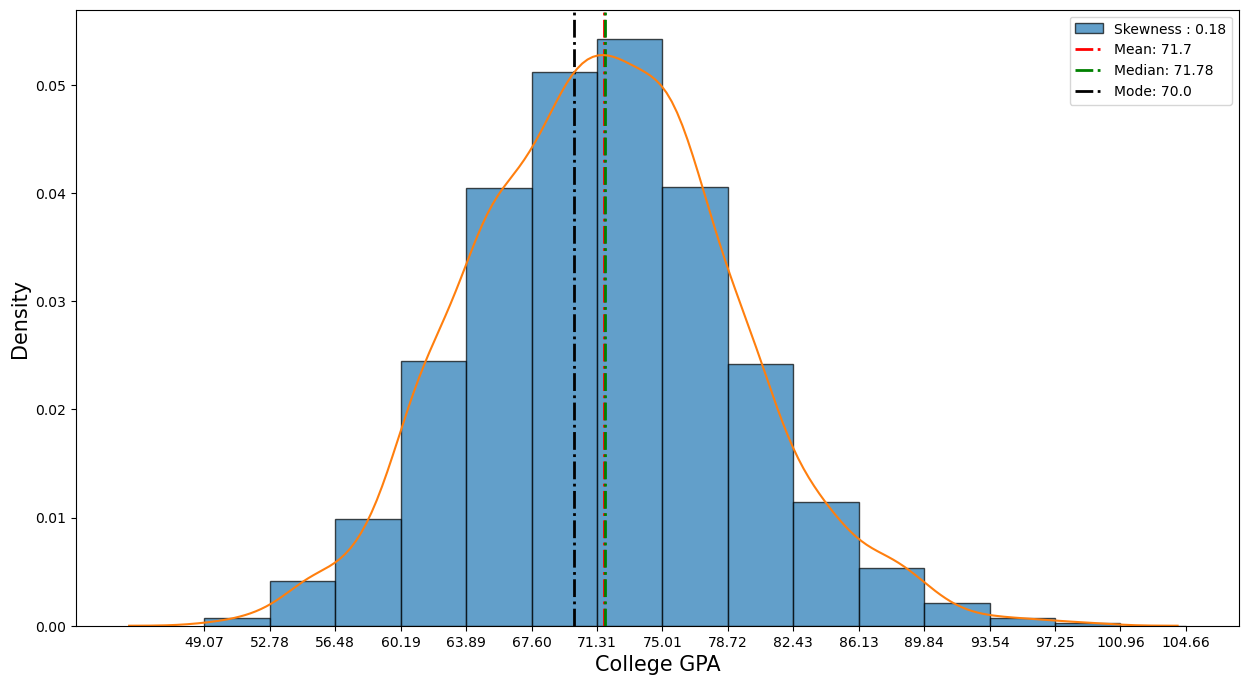

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


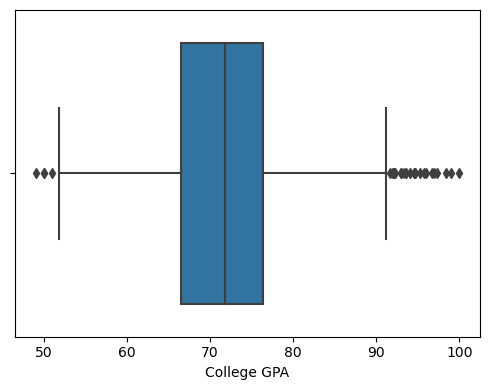

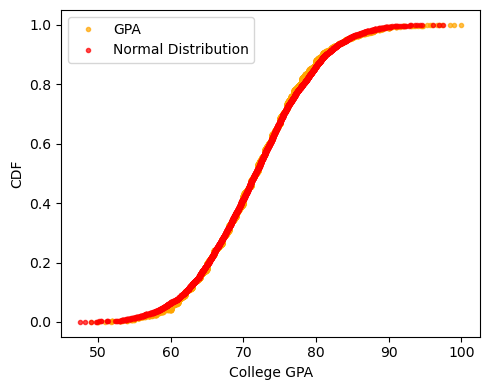

In [47]:
#Summary Plot

plt.figure(figsize=(5,4))
df['collegeGPA'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for College GPA')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(df['collegeGPA'].min(), df['collegeGPA'].max()+df['collegeGPA'].std(),
                 df['collegeGPA'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['collegeGPA'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['collegeGPA'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('College GPA', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['collegeGPA'].mean(), label = f"Mean: {round(df['collegeGPA'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['collegeGPA'].median(), label = f"Median: {round(df['collegeGPA'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['collegeGPA'].mode()[0], label = f"Mode: {round(df['collegeGPA'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['collegeGPA'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df['collegeGPA'])
plt.xlabel('College GPA')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_gpa, y_gpa = cdf(df['collegeGPA'])
x_sample_gpa , y_sample_gpa = \
cdf(np.random.normal(df['collegeGPA'].mean(), df['collegeGPA'].std(), size = len(df['12percentage'])))
plt.plot(x_gpa, y_gpa, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'GPA')
plt.plot(x_sample_gpa, y_sample_gpa, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('College GPA')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations


 1. `Summary Plot`  75% of students had a GPA of approximately 80% or lower. 
 2. `Histogram`  The majority of students had GPAs ranging between 63% and 78%. The highest frequency of students scored 70%, and the average GPA was 74%. 
 3. `Box Plot`  The box plot reveals the presence of both low and high extreme values within the dataset. 
 4. `CDF`  The data is deemed to be sufficiently normally distributed. 


#### 6. English

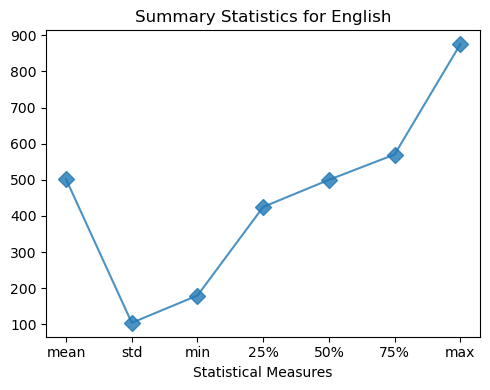

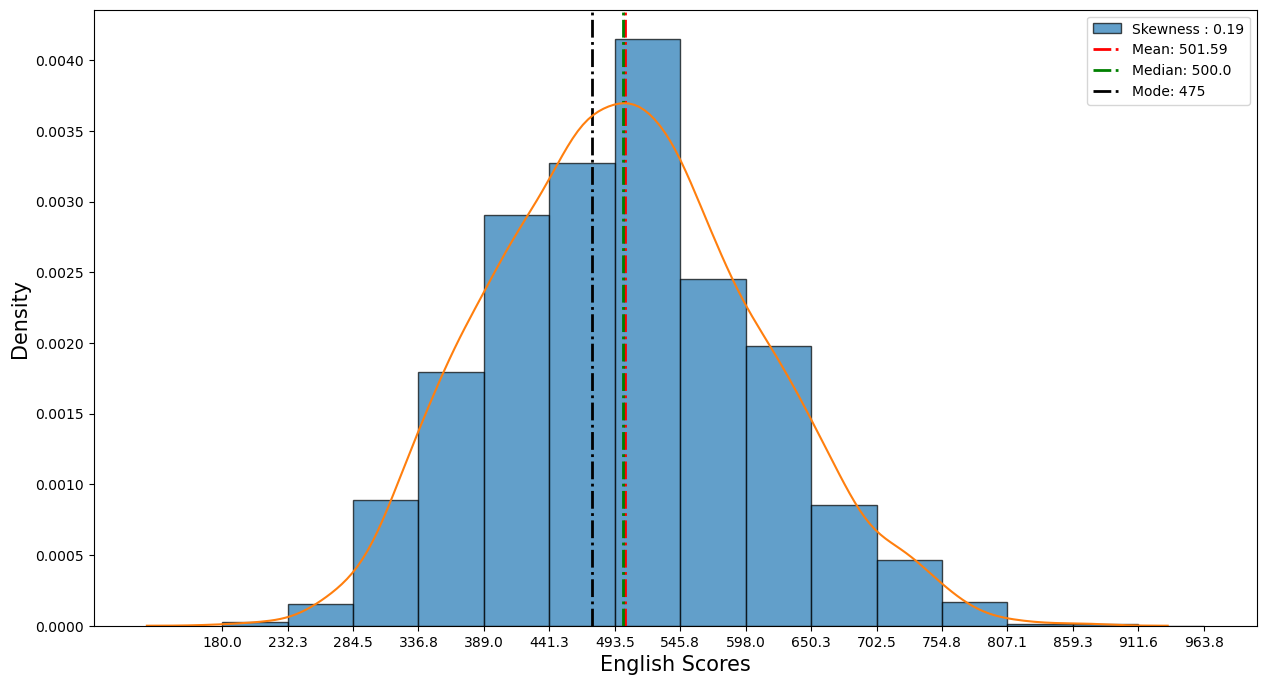

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


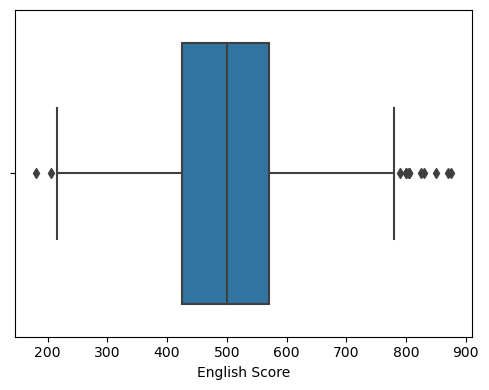

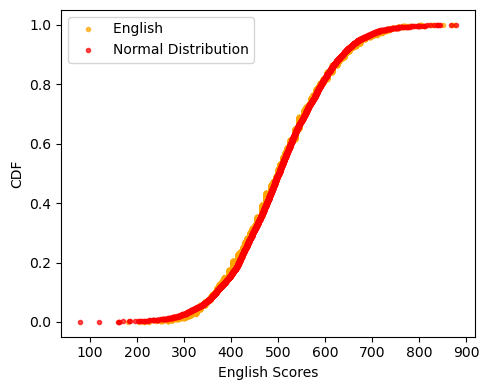

In [48]:
# Summary Plot

plt.figure(figsize=(5,4))
df['English'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for English')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(df['English'].min(), df['English'].max()+df['English'].std(),
                 df['English'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['English'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['English'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('English Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['English'].mean(), label = f"Mean: {round(df['English'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['English'].median(), label = f"Median: {round(df['English'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['English'].mode()[0], label = f"Mode: {round(df['English'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['English'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df['English'])
plt.xlabel('English Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_eng, y_eng = cdf(df['English'])
x_sample_eng , y_sample_eng = \
cdf(np.random.normal(df['English'].mean(), df['English'].std(), size = len(df['English'])))
plt.plot(x_eng, y_eng, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'English ')
plt.plot(x_sample_eng, y_sample_eng, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('English Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations


1. `Summary Plot` Half of the students scored below 500 in their English exams.                                                                      
2. `Histogram` The bulk of the scores fell within the range of 389 to 545. The peak occurred at 475, with an average score of 502.               
3. `Box Plot`  Both lower and higher extreme values are evident from the distribution representation.                                                                 
4. `CDF` The data follows a reasonably normal distribution pattern.                                                                                                          


#### 1.7 Logical

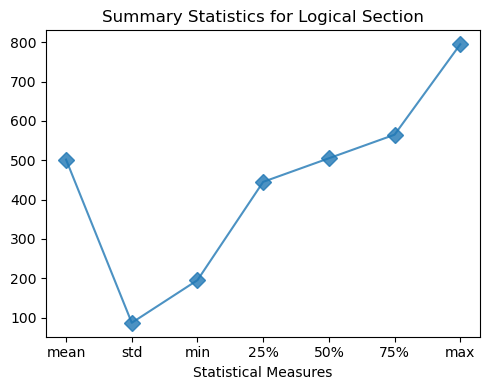

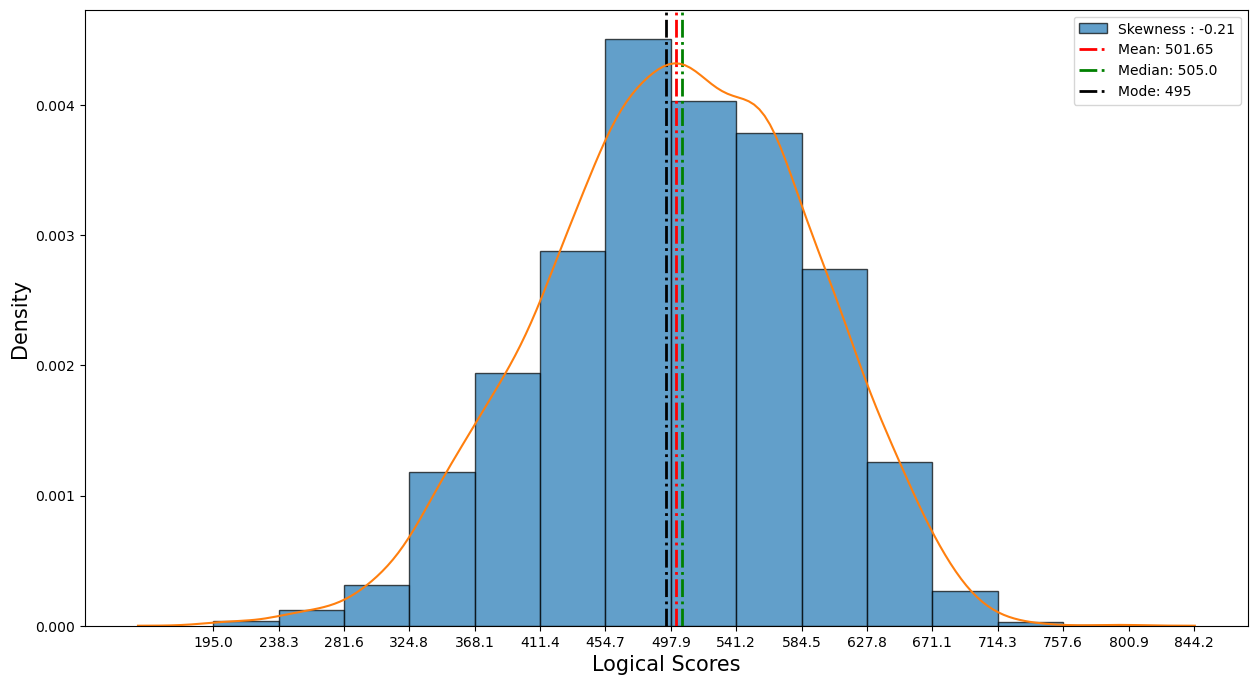

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


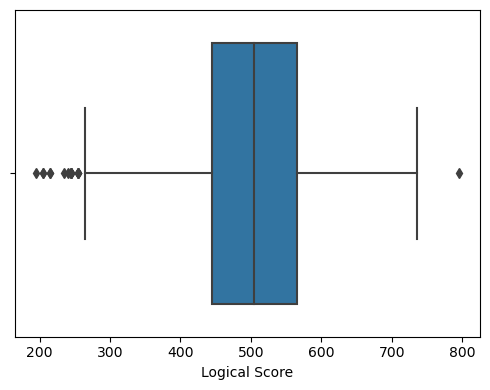

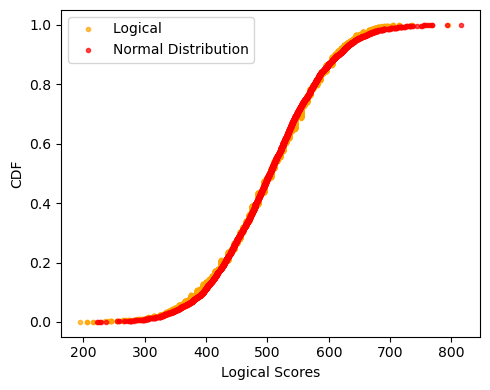

In [49]:
# Summary Plot

plt.figure(figsize=(5,4))
df['Logical'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Logical Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(df['Logical'].min(), df['Logical'].max()+df['Logical'].std(),
                 df['Logical'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['Logical'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['Logical'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Logical Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['Logical'].mean(), label = f"Mean: {round(df['Logical'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['Logical'].median(), label = f"Median: {round(df['Logical'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['Logical'].mode()[0], label = f"Mode: {round(df['Logical'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['Logical'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df['Logical'])
plt.xlabel('Logical Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_log, y_log = cdf(df['Logical'])
x_sample_log , y_sample_log = \
cdf(np.random.normal(df['Logical'].mean(), df['Logical'].std(), size = len(df['Logical'])))
plt.plot(x_log, y_log, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Logical ')
plt.plot(x_sample_log, y_sample_log, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Logical Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations


 1. `Summary Plot`   Half of the students scored below 500 in the logical exams. 
 2. `Histogram`    Most scores fell within the range of 454 to 584, peaking at 495, with an average of 502.
 3. `Box Plot`     Presence of lower extreme values, with only one high extreme value being notable.      
 4. `CDF`     Data closely approximates a normal distribution pattern.  


#### 8. Quant

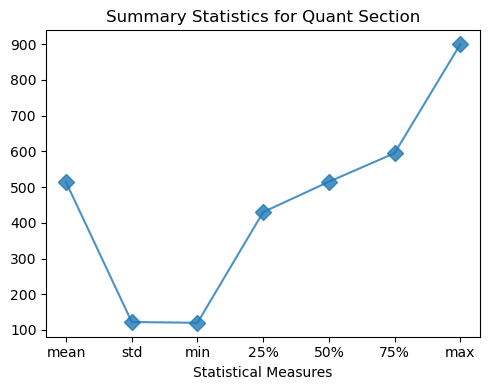

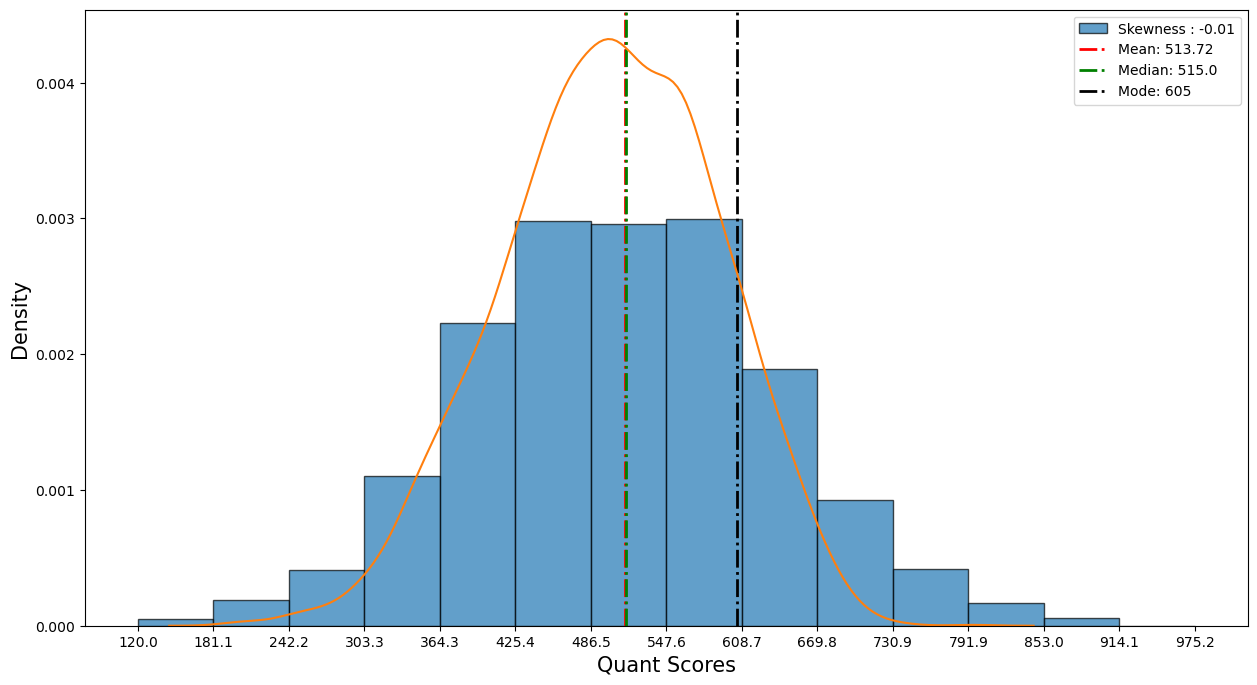

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


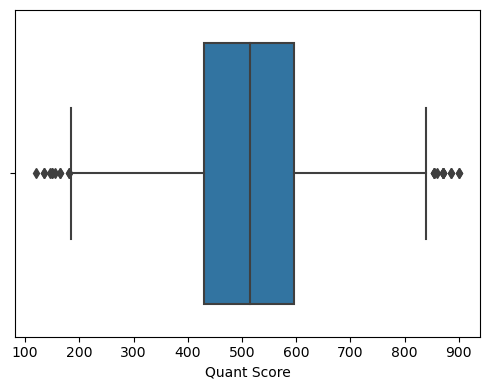

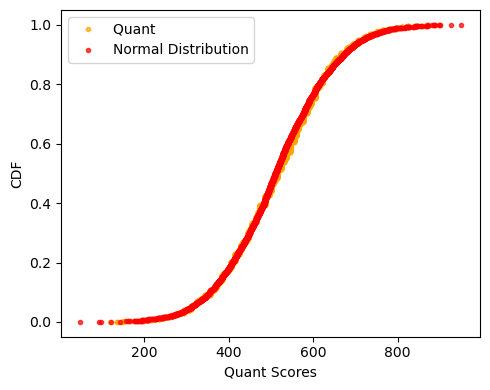

In [50]:
# Summary Plot

plt.figure(figsize=(5,4))
df['Quant'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Quant Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(df['Quant'].min(), df['Quant'].max()+df['Quant'].std(),
                 df['Quant'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['Quant'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['Quant'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Quant Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['Quant'].mean(), label = f"Mean: {round(df['Quant'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['Quant'].median(), label = f"Median: {round(df['Quant'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['Quant'].mode()[0], label = f"Mode: {round(df['Quant'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['Logical'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df['Quant'])
plt.xlabel('Quant Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_q, y_q = cdf(df['Quant'])
x_sample_q , y_sample_q = \
cdf(np.random.normal(df['Quant'].mean(), df['Quant'].std(), size = len(df['Quant'])))
plt.plot(x_q, y_q, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Quant ')
plt.plot(x_sample_q, y_sample_q, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Quant Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations


1. `Summary Plot`  75% of students' logical score was less than 600.                                 
2. `Histogram`  Majority of the scores were in between 425-608. The maximum number of students scored 605 with an average of 513. 
3. `Box Plot`  The box plot shows the presence of both low and high extreme values.               
4. `CDF`  The data is sufficiently close to normally distributed.                           


#### 9. Computer Programming

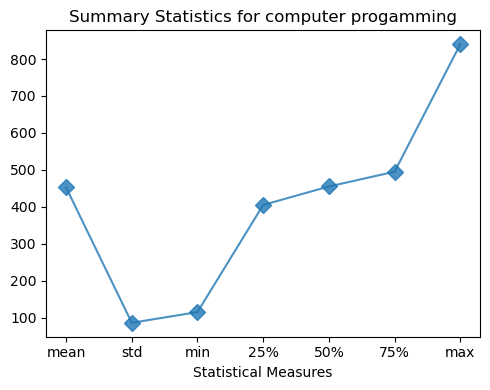

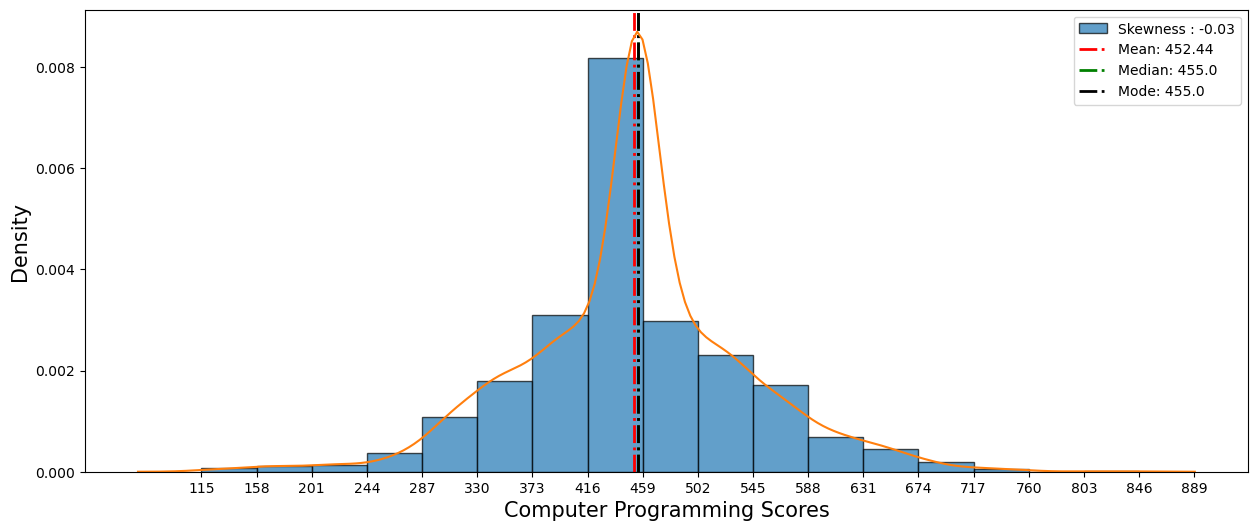

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


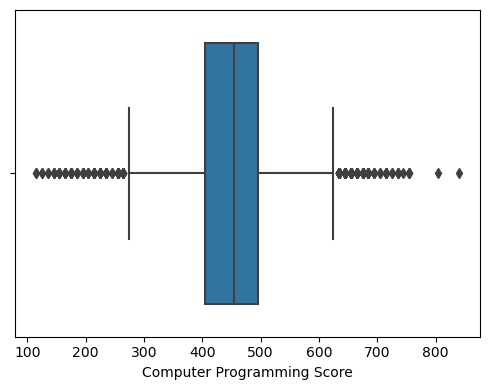

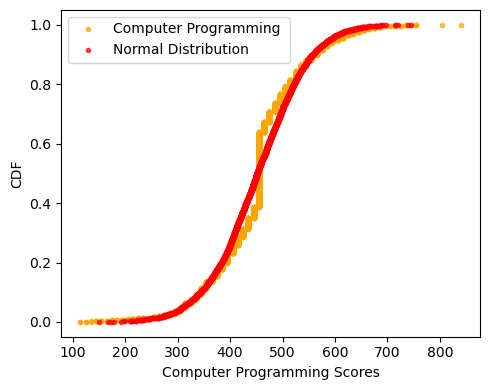

In [51]:
# Summary Plot

plt.figure(figsize=(5,4))
df['ComputerProgramming'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for computer progamming')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(df['ComputerProgramming'].min(), df['ComputerProgramming'].max()+df['ComputerProgramming'].std(),
                 df['ComputerProgramming'].std()/2)
plt.figure(figsize = (15,6))
plt.hist(df['ComputerProgramming'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['ComputerProgramming'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Computer Programming Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['ComputerProgramming'].mean(), label = f"Mean: {round(df['ComputerProgramming'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['ComputerProgramming'].median(), label = f"Median: {round(df['ComputerProgramming'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['ComputerProgramming'].mode()[0], label = f"Mode: {round(df['ComputerProgramming'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['ComputerProgramming'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df['ComputerProgramming'])
plt.xlabel('Computer Programming Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_cp, y_cp = cdf(df['ComputerProgramming'])
x_sample_cp , y_sample_cp = \
cdf(np.random.normal(df['ComputerProgramming'].mean(), df['ComputerProgramming'].std(), size = \
                     len(df['ComputerProgramming'])))
plt.plot(x_cp, y_cp, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Computer Programming ')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Computer Programming Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations


1. `Summary Plot` 50% of students' scores were below 500.                                            
2. `Histogram`              The majority of scores ranged between 416 and 459. The peak occurred at 455, with an average score of 452. 
3. `Box Plot`               The box plot illustrates the presence of numerous low extreme values as well as high extreme values. 
4. `CDF`                    The data does not follow a normal distribution pattern.                             


#### 10. Electronics & Semiconductors

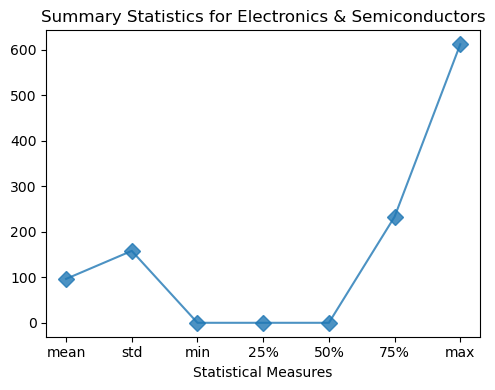

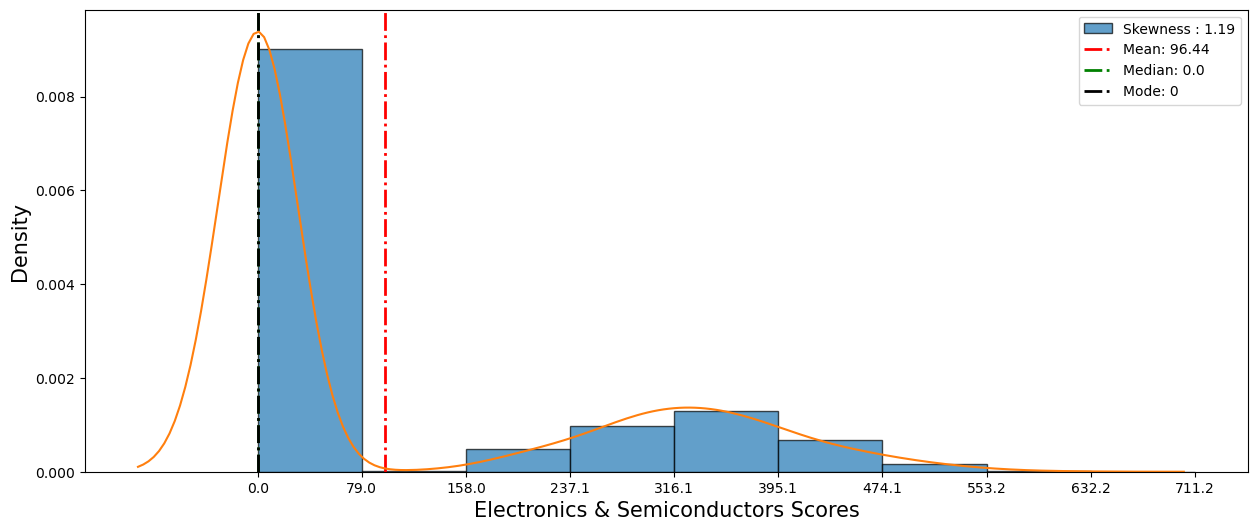

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


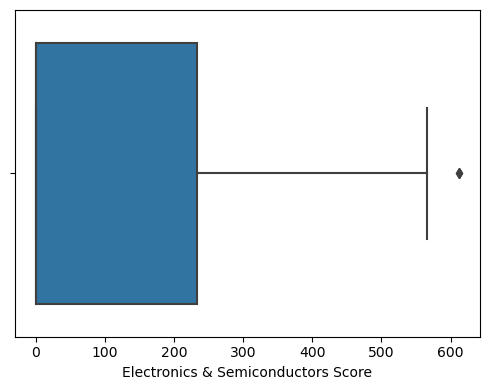

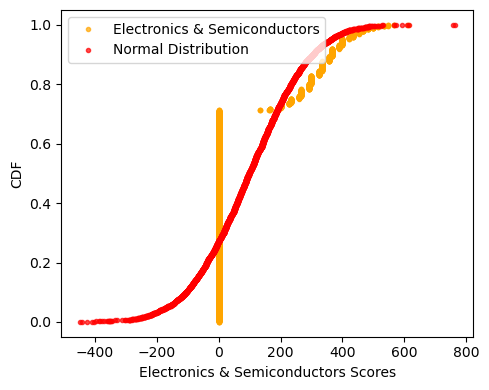

In [52]:
# Summary Plot

plt.figure(figsize=(5,4))
df['ElectronicsAndSemicon'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Electronics & Semiconductors')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(df['ElectronicsAndSemicon'].min(), df['ElectronicsAndSemicon'].max()+df['ElectronicsAndSemicon'].std(),
                 df['ElectronicsAndSemicon'].std()/2)
plt.figure(figsize = (15,6))
plt.hist(df['ElectronicsAndSemicon'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['ElectronicsAndSemicon'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Electronics & Semiconductors Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['ElectronicsAndSemicon'].mean(), label = f"Mean: {round(df['ElectronicsAndSemicon'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['ElectronicsAndSemicon'].median(), label = f"Median: {round(df['ElectronicsAndSemicon'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['ElectronicsAndSemicon'].mode()[0], label = f"Mode: {round(df['ElectronicsAndSemicon'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['ElectronicsAndSemicon'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df['ElectronicsAndSemicon'])
plt.xlabel('Electronics & Semiconductors Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_cp, y_cp = cdf(df['ElectronicsAndSemicon'])
x_sample_cp , y_sample_cp = \
cdf(np.random.normal(df['ElectronicsAndSemicon'].mean(), df['ElectronicsAndSemicon'].std(), size = \
                     len(df['ElectronicsAndSemicon'])))
plt.plot(x_cp, y_cp, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Electronics & Semiconductors')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Electronics & Semiconductors Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations

1. `Summary Plot`           About 75% of students scored less than 250.                                    
2. `Histogram`              Most scores fell between 0 and 79. The highest number of students scored 0, with an average score of 96. 
3. `Box Plot`               The lowest score is equal to the median of the dataset.                         
4. `CDF`                    The data does not conform to a normal distribution pattern.                      


#### 11. Age

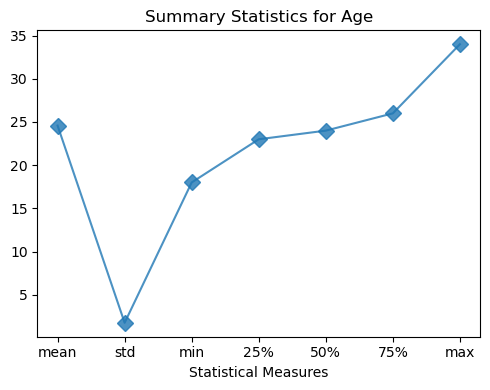

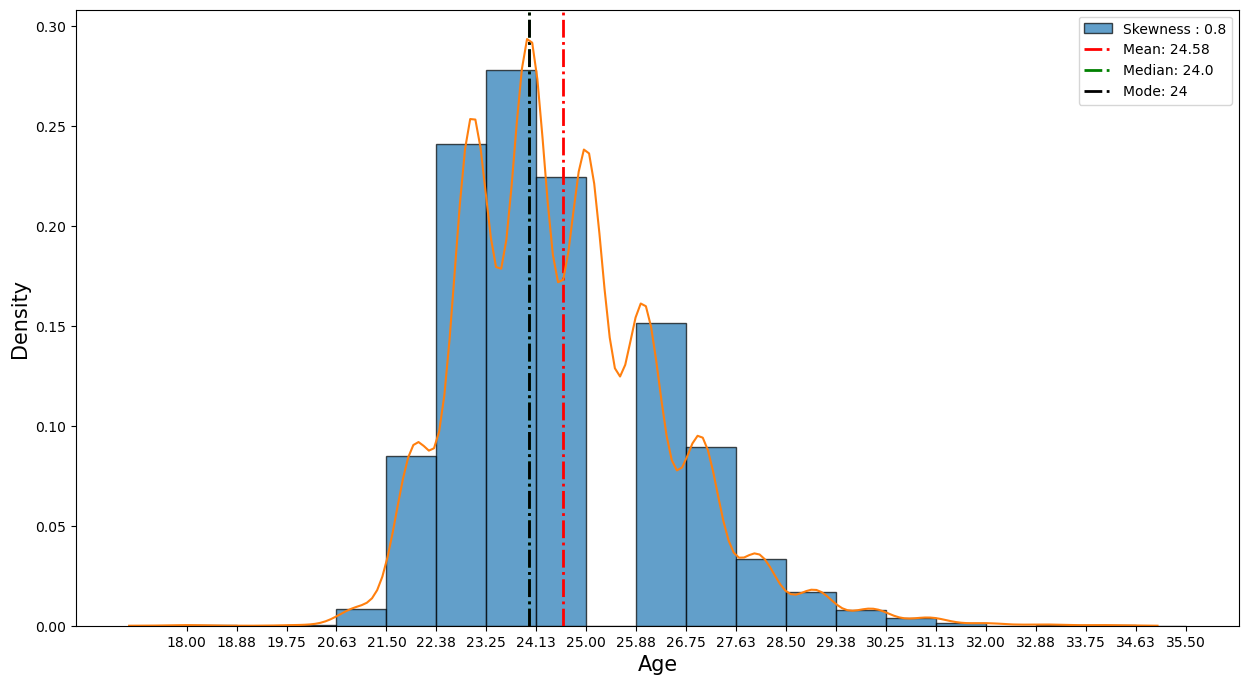

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


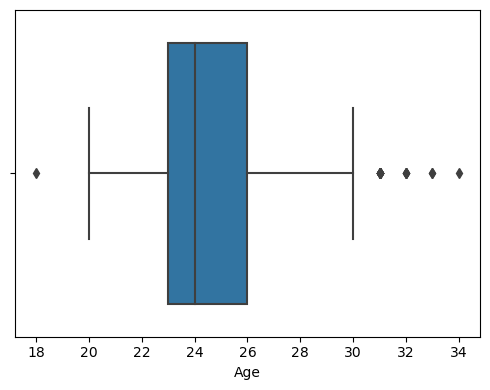

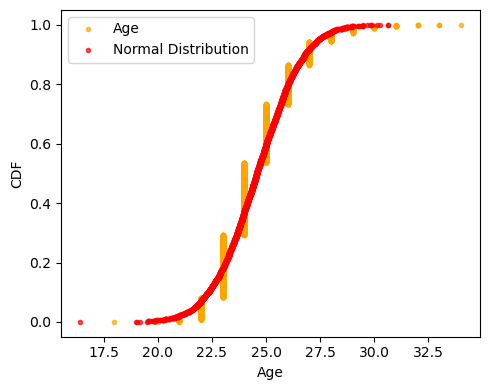

In [53]:
# Summary Plot

plt.figure(figsize=(5,4))
df['Age'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Age')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(df['Age'].min(), df['Age'].max()+df['Age'].std(),
                 df['Age'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(df['Age'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df['Age'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Age', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df['Age'].mean(), label = f"Mean: {round(df['Age'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df['Age'].median(), label = f"Median: {round(df['Age'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df['Age'].mode()[0], label = f"Mode: {round(df['Age'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df['Age'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_cp, y_cp = cdf(df['Age'])
x_sample_cp , y_sample_cp = \
cdf(np.random.normal(df['Age'].mean(), df['Age'].std(), size = \
                     len(df['Age'])))
plt.plot(x_cp, y_cp, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Age')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Observations


1. `Summary Plot`           Approximately 75% of students are under 26 years old.                           
2. `Histogram`              The majority of students' ages ranged between 22 and 25. The mean, median, and mode ages are approximately 25. 
3. `Box Plot`               The box plot indicates the presence of 4 students with very high ages and one with a very low age compared to other data points. 
4. `CDF`                    The age data does not follow a normal distribution pattern.                      


### 2. Categorical Features

#### 1. Designation

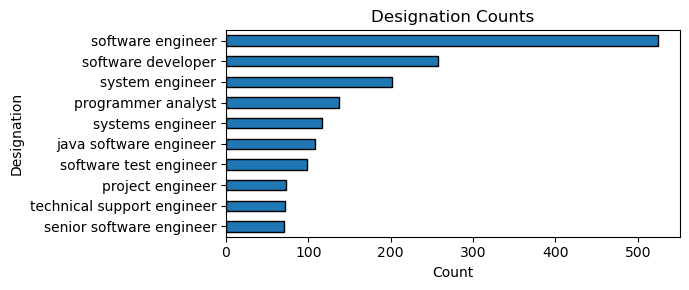

In [54]:
df['Designation'].value_counts()[1:].sort_values(
    ascending=True
).plot(
    kind='barh',
    title='Designation Counts',
    figsize=(7, 3),
    ec='k'
)
plt.ylabel('Designation')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

##### Observations

Software engineer is the most common desgination of all, followed by system engineer and software developer.

#### 2. JobCity

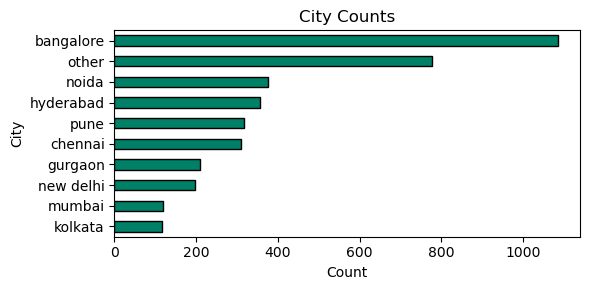

In [55]:
df['JobCity'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    cmap='summer',
    title='City Counts',
    figsize=(6,3),
    ec='k'
)
plt.ylabel('City')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


##### Observations

The most favourable city for job placements is bangalore, followed by Noid, Hyderabad and pune. Mumbai and kolkata being least favourable.
    

#### 3. Gender

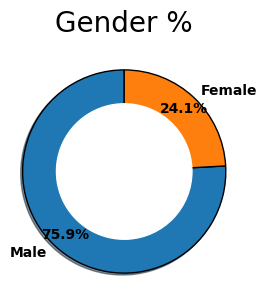

In [56]:
plt.figure(figsize=(3,3))
plt.pie(df['Gender'].value_counts().tolist(),
        labels=df['Gender'].value_counts().index,
        autopct='%1.1f%%',
        radius=1.5,
        wedgeprops={'edgecolor': 'k'},
        textprops={'fontsize': 10, 'fontweight': 'bold'},
        shadow=True,
        startangle=90,
        pctdistance=0.85)
plt.pie(df['Gender'].value_counts().tolist(),
        colors=['white'],
        wedgeprops={'edgecolor': 'white'},
        radius=1)
plt.title('Gender %', pad=40, size=20)
plt.tight_layout()
plt.show()


##### Observations

The dataset is not balanced in terms of gender as the population of Male is really larger as compared to the female one.

#### 4. 10board & 12board

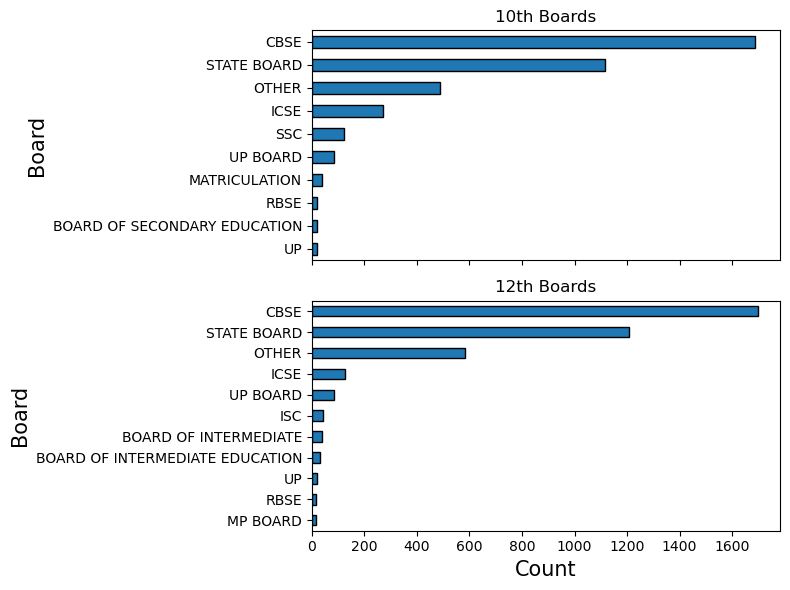

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

df['10board'].str.upper().value_counts().sort_values(ascending=True).plot(
    kind='barh',
    ax=ax[0],
    ec='k',
    title='10th Boards'
)
ax[0].set_ylabel('Board', size=15)

df['12board'].str.upper().value_counts().sort_values(ascending=True).plot(
    kind='barh',
    ax=ax[1],
    ec='k',
    title='12th Boards'
)
ax[1].set_ylabel('Board', size=15)
ax[1].set_xlabel('Count', size=15)

plt.tight_layout()
plt.show()

##### Observations

CBSE is the most common school board for both 12th and 10th.

#### 5. CollegeTier

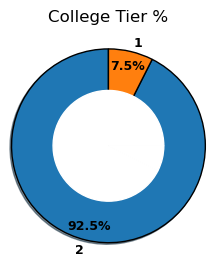

In [58]:
plt.figure(figsize=(3,3))
plt.pie(df['CollegeTier'].value_counts().tolist(), labels = df['CollegeTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.75,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':9,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.85)
plt.pie(df['CollegeTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 40, size = 12)
plt.margins(0.02)
plt.tight_layout()
plt.show()

##### Observations

Almost all the college belongs to Tier 1 only with a percentage of 92.5

#### 6. Degree

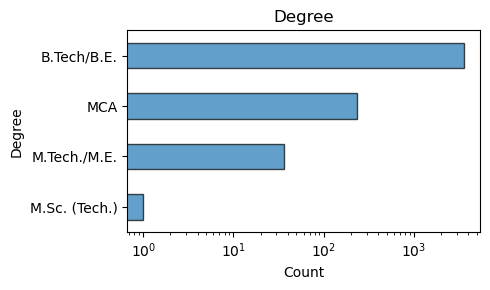

In [59]:
df['Degree'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    title='Degree',
    figsize=(5, 3),
    ec='k',
    alpha=0.7
)
plt.ylabel('Degree')
plt.xlabel('Count')
plt.xscale('log')
plt.tight_layout()
plt.show()


##### Observations

Most of the students have done their graduation in B.Tech and there are very less students from M.Sc(Tech)

#### 7. CollegeCityTier

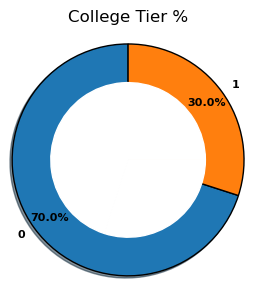

In [60]:
plt.figure(figsize=(3,3))
plt.pie(df['CollegeCityTier'].value_counts().tolist(), labels = df['CollegeCityTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':8,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.84)
plt.pie(df['CollegeCityTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 30, size = 12)
plt.margins(0.02)
plt.tight_layout()
plt.show()

##### Observations

Majority of the colleges are form Tier 0 city.

#### 8. GraduationYear

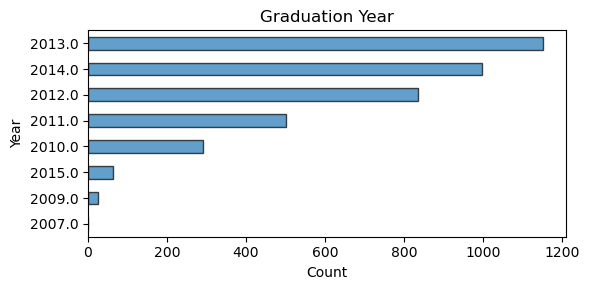

In [61]:
df['GraduationYear'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    title='Graduation Year',
    figsize=(6, 3),
    ec='k',
    alpha=0.7
)
plt.ylabel('Year')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


 #### Observations

Maximum number of students were graduated in 2013, followed by the year 2014 and 2012.

### Removing Outliers

In [62]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [63]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age', 'Tenure'],
      dtype='object')

In [64]:
columns = ['Salary','10percentage','12percentage','English',
          'Logical','Quant','Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age', 'Tenure']
df1 = df.copy()

In [65]:
for cols in columns:
    lowerbound, upperbound = outlier_treatment(df1[cols])

    df1 = df1.drop(df1[(df1[cols] < lowerbound) | (df1[cols] > upperbound)].index)

In [66]:
print(f'Number of observation with outliers: {df.shape[0]}')
print(f'Number of observations without outliers: {df1.shape[0]}')

Number of observation with outliers: 3864
Number of observations without outliers: 2490


## Bivariate Analysis

### 1. Barplots

#### 1. Average Salary for each Designation

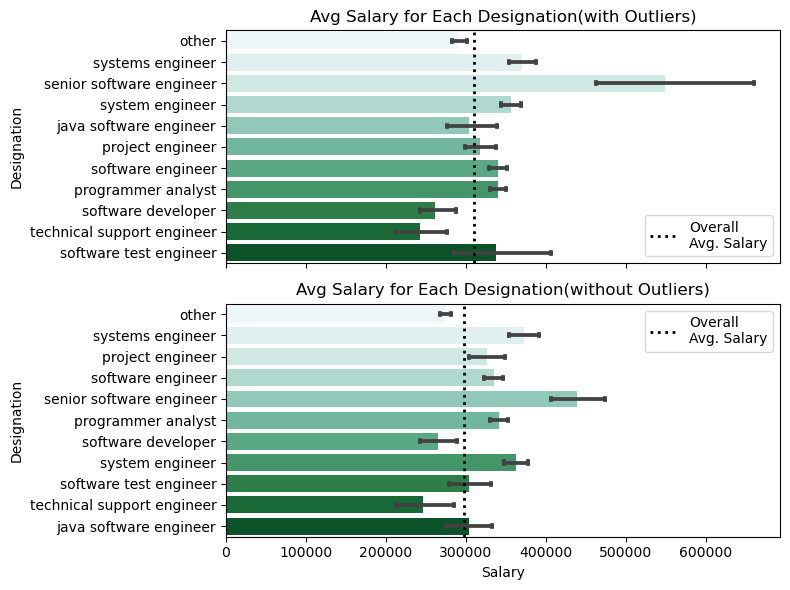

In [67]:
fig, ax = plt.subplots(2, 1, figsize = (8,6), sharex = True)
sns.barplot(x = 'Salary', y = 'Designation',
           data = df,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(df['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary for Each Designation(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'Salary', y = 'Designation',
           data = df1,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(df1['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('Avg Salary for Each Designation(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')

plt.tight_layout()
plt.show()

##### Observations

Bar plot shows the maximum salary for each Designation. Senior Software Engineer has the highest salary but they also has the maximum standard deviation in their salary. There are only two designations namely, software developer and technical support engineer who has salary lower than average salary.

#### 2. Average Salary for each Gender

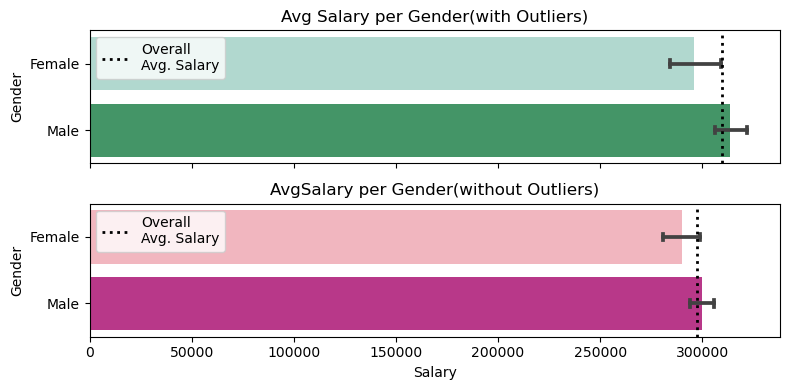

In [68]:
fig, ax = plt.subplots(2, 1, figsize = (8,4), sharex = True)
sns.barplot(x = 'Salary', y = 'Gender',
           data = df,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(df['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary per Gender(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'Salary', y = 'Gender',
           data = df1,
           palette = 'RdPu',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(df1['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('AvgSalary per Gender(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')


plt.tight_layout()
plt.show()

### 2. Scatter Plots

#### 1. Salary & 10th score

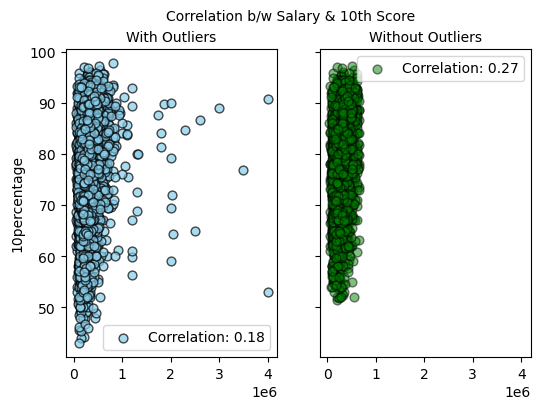

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(df['Salary'],df['10percentage'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.7,
               s = 40,
               label = f"Correlation: {round(df[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('10percentage')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(df1['Salary'],df1['10percentage'],
               ec = 'k',
               color = 'green',
               alpha = 0.5,
               s = 40,
               label = f"Correlation: {round(df1[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()


fig.suptitle('Correlation b/w Salary & 10th Score', size = 10)
plt.show()

##### Observations

There does not exist any correlation between Salary and 10th scores.

#### 2. Salary & 12th score

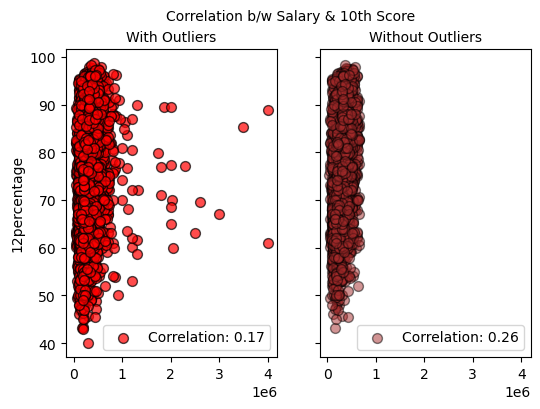

In [70]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(df['Salary'],df['12percentage'],
               ec = 'k',
               color = 'red',
               alpha = 0.7,
               s = 50,
               label = f"Correlation: {round(df[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('12percentage')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(df1['Salary'],df1['12percentage'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               s = 50,
               label = f"Correlation: {round(df1[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()

fig.suptitle('Correlation b/w Salary & 10th Score', size = 10)
plt.show()

##### Observations

There does not exist any correlation between Salary and 10th scores.

#### 3. Salary & CollegeGPA score

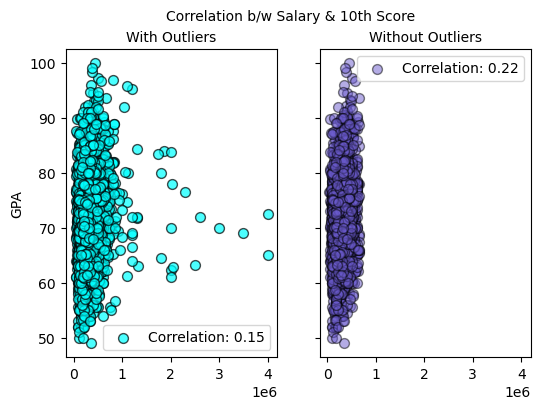

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(df['Salary'],df['collegeGPA'],
               ec = 'k',
               color = 'cyan',
               alpha = 0.7,
               s = 50,
               label = f"Correlation: {round(df[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('GPA')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(df1['Salary'],df1['collegeGPA'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               s = 50,
               label = f"Correlation: {round(df1[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()

fig.suptitle('Correlation b/w Salary & 10th Score', size = 10)
plt.show()

##### Observations

There does not exist any correlation between Salary and 10th scores.

#### 4. Salary & Age

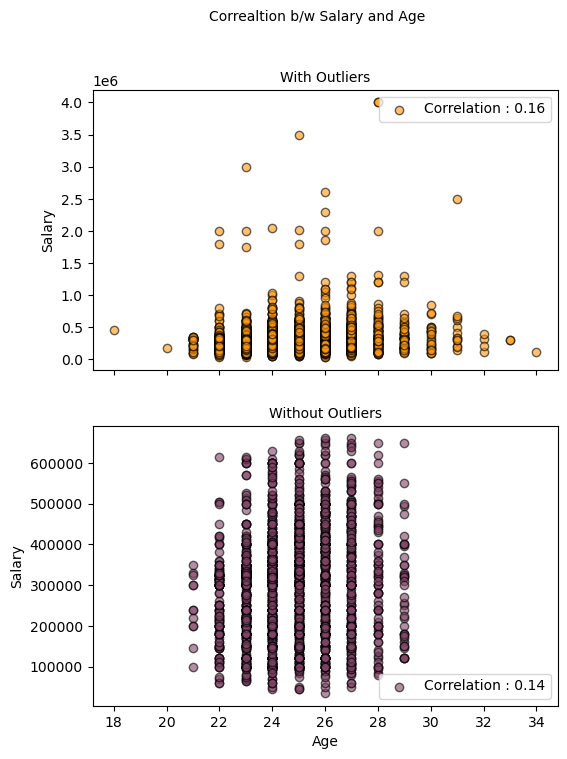

In [72]:
fig, ax = plt.subplots(2, 1, figsize = (6,8), sharex  = True)
ax[0].scatter(df['Age'], df['Salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(df[['Age','Salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers' , size=10)


ax[1].scatter(df1['Age'], df1['Salary'],
             ec = 'k',
             color = '#834567',
             alpha = 0.6,
             label = f"Correlation : {round(df1[['Age','Salary']].corr().iloc[1,0],2)}"
             )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers' , size=10)
ax[1].set_xlabel('Age')

fig.suptitle('Correaltion b/w Salary and Age', size = 10)

plt.show()

##### Observations

After removing the outliers, it is evident that the salary and age are not related to each other.

#### 5. Salary & Tenure

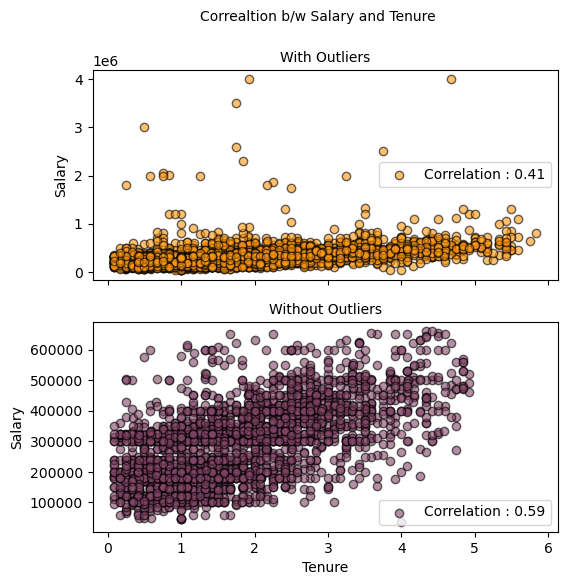

In [73]:
fig, ax = plt.subplots(2, 1, figsize = (6,6), sharex  = True)
ax[0].scatter(df['Tenure'], df['Salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(df[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers' , size=10)


ax[1].scatter(df1['Tenure'], df1['Salary'],
             ec = 'k',
             color = '#834567',
             alpha = 0.6,
             label = f"Correlation : {round(df1[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers' , size=10)
ax[1].set_xlabel('Tenure')

fig.suptitle('Correaltion b/w Salary and Tenure', size = 10)

plt.show()

##### Observations

After removing the outliers, it is evident that salary gets about 50% of increment as tenure increase as there is a positive correlation of 0.60.


#### 6. Salary with English, Quants, Logical

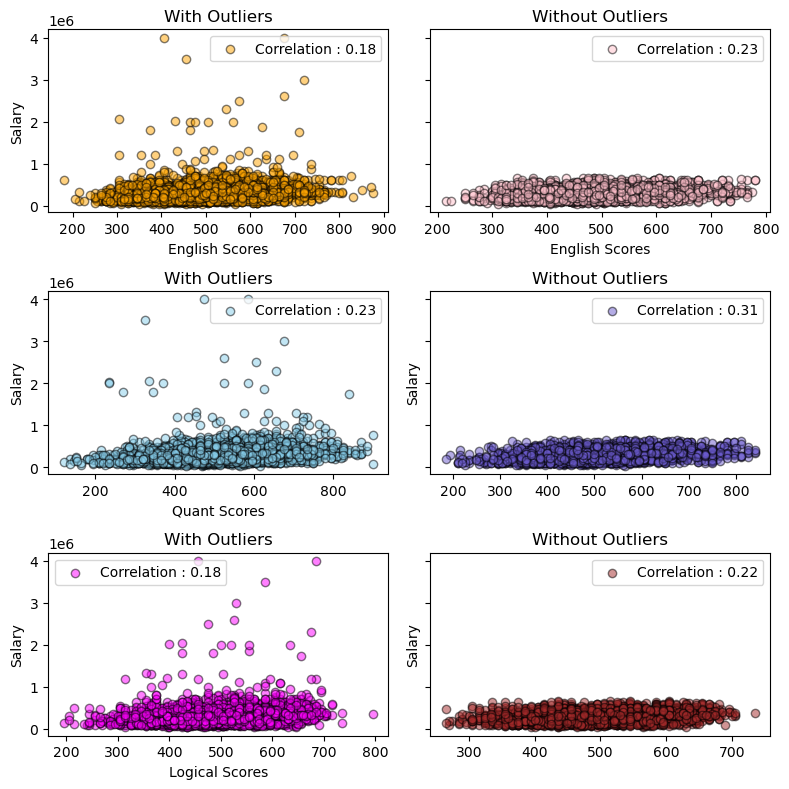

In [74]:
fig, ax = plt.subplots(3, 2, figsize = (8,8), sharey = True)
ax[0,0].scatter(df['English'],df['Salary'],
               ec = 'k',
               color = 'orange',
               alpha = 0.5,
               label = f"Correlation : {round(df[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('Salary')
ax[0,0].set_xlabel('English Scores')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(df1['English'],df1['Salary'],
               ec = 'k',
               color = 'pink',
               alpha = 0.5,
               label = f"Correlation : {round(df1[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].set_xlabel('English Scores')
ax[0,1].legend()




ax[1,0].scatter(df['Quant'],df['Salary'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.5,
               label = f"Correlation : {round(df[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('Salary')
ax[1,0].set_xlabel('Quant Scores')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(df1['Quant'],df1['Salary'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               label = f"Correlation : {round(df1[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_ylabel('Salary')
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()



ax[2,0].scatter(df['Logical'],df['Salary'],
               ec = 'k',
               color = 'magenta',
               alpha = 0.5,
               label = f"Correlation : {round(df[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('Salary')
ax[2,0].set_xlabel('Logical Scores')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(df1['Logical'],df1['Salary'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               label = f"Correlation : {round(df1[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_ylabel('Salary')
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()


plt.tight_layout()
plt.show()

##### Observations

The scatters plots above gives adequate evidence that salary is not effected by any of the above scores.

### 3. Crosstabs

#### Gender and Specialization

<AxesSubplot:ylabel='Specialization'>

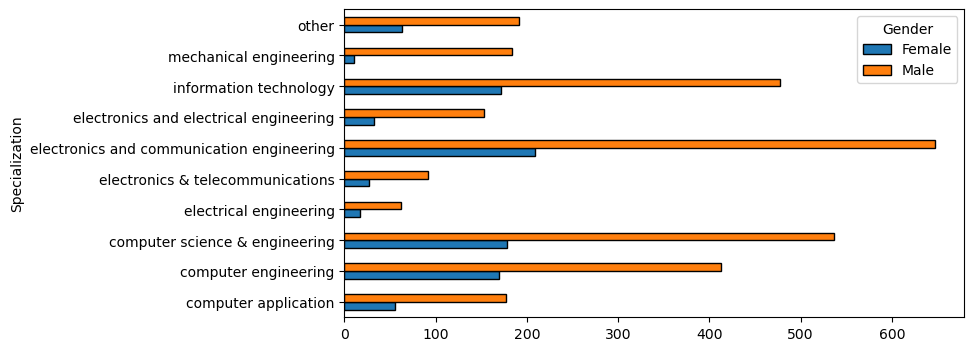

In [75]:
pd.crosstab(df['Gender'],df['Specialization']).T.plot(kind = 'barh',
                                                     ec = 'k',
                                                     figsize = (8,4))

##### Observations

There are almost males 2 times as of females in every specialization. Also, there are very less number of females who opted for mechanical and electronics.

### 4. Pivot Tables

#### 1. Average Salary per JobCity

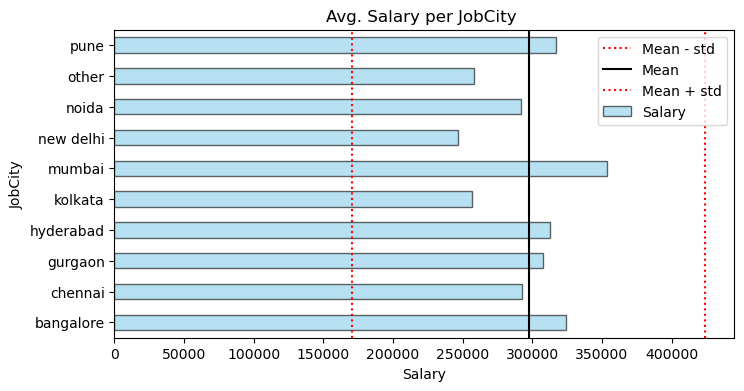

In [76]:
pd.pivot_table(index = 'JobCity',
              values = 'Salary',
              data = df1).plot(kind = 'barh',
                             ec = 'k',
                            alpha = 0.6,
                                  color = 'skyblue',
                                  title = 'Avg. Salary per JobCity ',
                                  figsize = (8,4))
plt.xlabel('Salary')
plt.axvline(df1['Salary'].mean() - df1['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df1['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df1['Salary'].mean() + df1['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

#### 2. Average Salary per CollegeTier

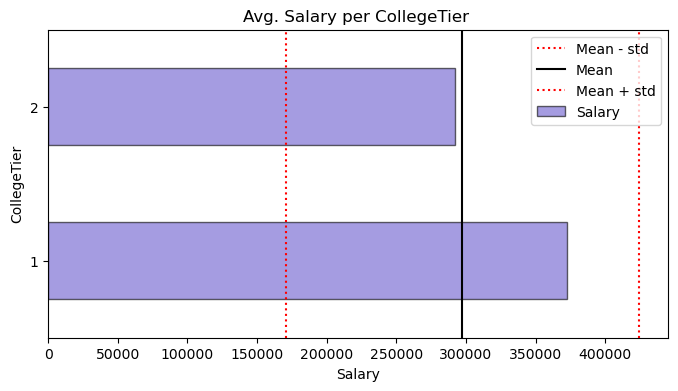

In [77]:
pd.pivot_table(index = 'CollegeTier',
              values = 'Salary',
              data = df1).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'slateblue',
                                  title = 'Avg. Salary per CollegeTier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df1['Salary'].mean() - df1['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df1['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df1['Salary'].mean() + df1['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

##### Observations

College within Tier 1 offers high salary as compared to the colleges in TIer 2. Colleges in Tier 2 offers below overall average salary.

#### 3. Average Salary per CollegeCityTier

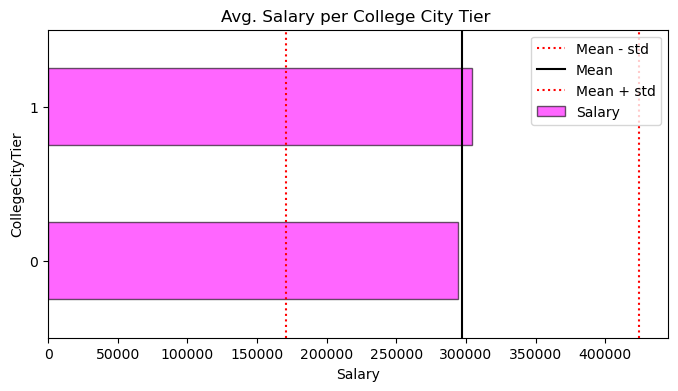

In [78]:
pd.pivot_table(index = 'CollegeCityTier',
              values = 'Salary',
              data = df1).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'magenta',
                                  title = 'Avg. Salary per College City Tier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df1['Salary'].mean() - df1['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df1['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df1['Salary'].mean() + df1['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

##### Obervations

Cities under Tier 1 and 2 offers almost same salaries to students.

In [79]:
df.describe(include='all')

C:\Users\shiva\AppData\Local\Temp\ipykernel_28168\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
C:\Users\shiva\AppData\Local\Temp\ipykernel_28168\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
C:\Users\shiva\AppData\Local\Temp\ipykernel_28168\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Tenure
count,3.864000e+03,3864,3864,3864,3864,3864,3864,3864.000000,3864,3864.000000,...,3864.000000,3864.000000,3864.000000,3864.00000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
unique,NaN,72,64,11,10,2,1841,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-07-01 00:00:00,2015-12-31 00:00:00,other,bangalore,Male,1991-01-01 00:00:00,NaN,cbse,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,194,1852,2205,1085,2932,11,NaN,1688,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2007-06-01 00:00:00,2009-06-01 00:00:00,NaN,NaN,NaN,1981-05-06 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-01 00:00:00,2015-12-31 00:00:00,NaN,NaN,NaN,1997-05-27 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.093838e+05,NaN,NaN,NaN,NaN,NaN,NaN,77.974503,NaN,2008.072723,...,452.441511,96.441253,90.826863,-0.03976,0.146948,-0.002940,-0.167970,-0.139965,24.584627,1.747741
std,2.125428e+05,NaN,NaN,NaN,NaN,NaN,NaN,9.832284,NaN,1.634833,...,85.997659,158.045705,174.661705,1.02725,0.940645,0.952482,1.006697,1.005369,1.750436,1.132959
min,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,NaN,1998.000000,...,115.000000,0.000000,0.000000,-4.12670,-5.781600,-4.600900,-2.643000,-7.375700,18.000000,0.080000
25%,1.850000e+05,NaN,NaN,NaN,NaN,NaN,NaN,71.845000,NaN,2007.000000,...,405.000000,0.000000,0.000000,-0.72640,-0.287100,-0.604800,-0.868200,-0.669200,23.000000,0.920000


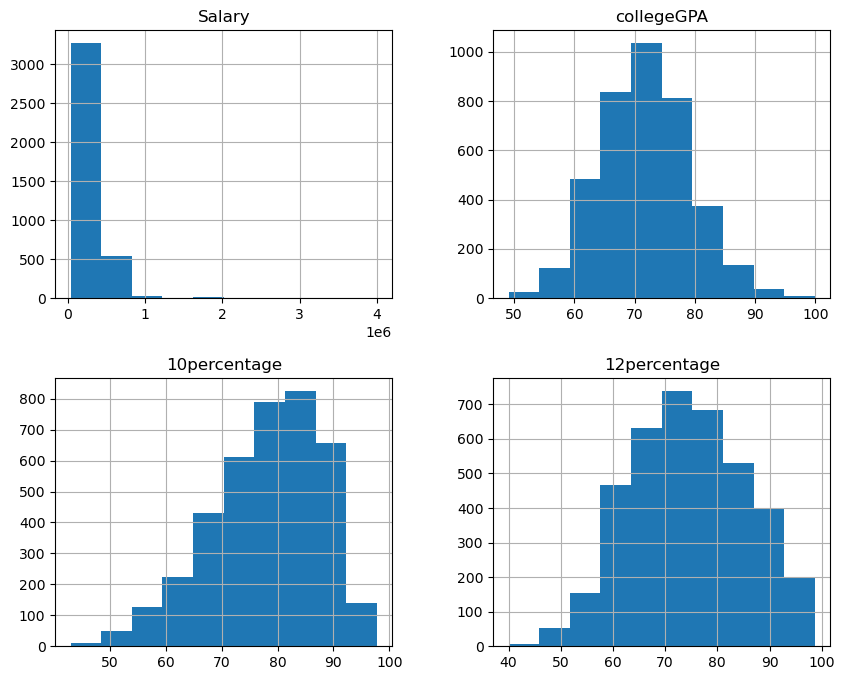

In [82]:
##Distribution of Numerical Variables: Plot histograms for continuous features like Salary, collegeGPA, etc.

df[['Salary', 'collegeGPA', '10percentage', '12percentage']].hist(figsize=(10, 8))
plt.show()

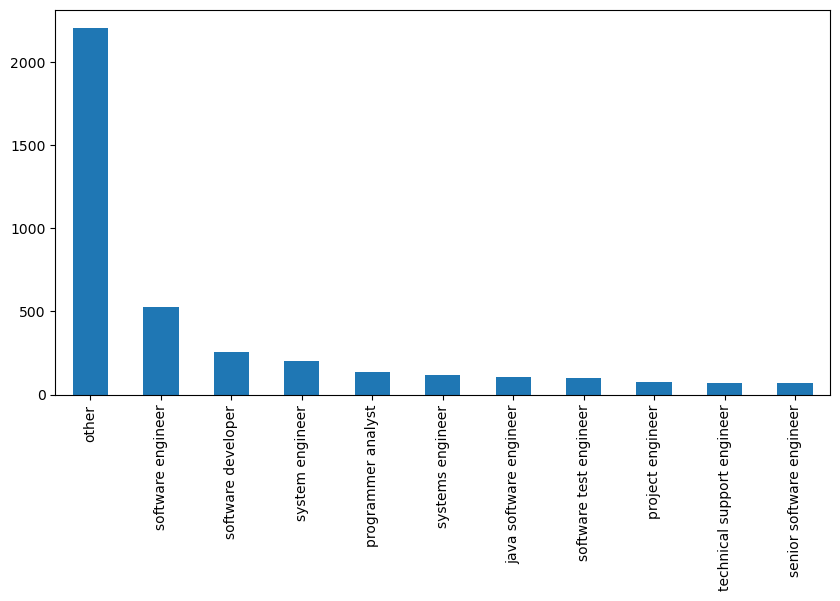

In [83]:
#Count of Categorical Variables: Plot bar charts for categorical variables such as Designation, JobCity, Gender.

df['Designation'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.show()


## Correlation Analysis

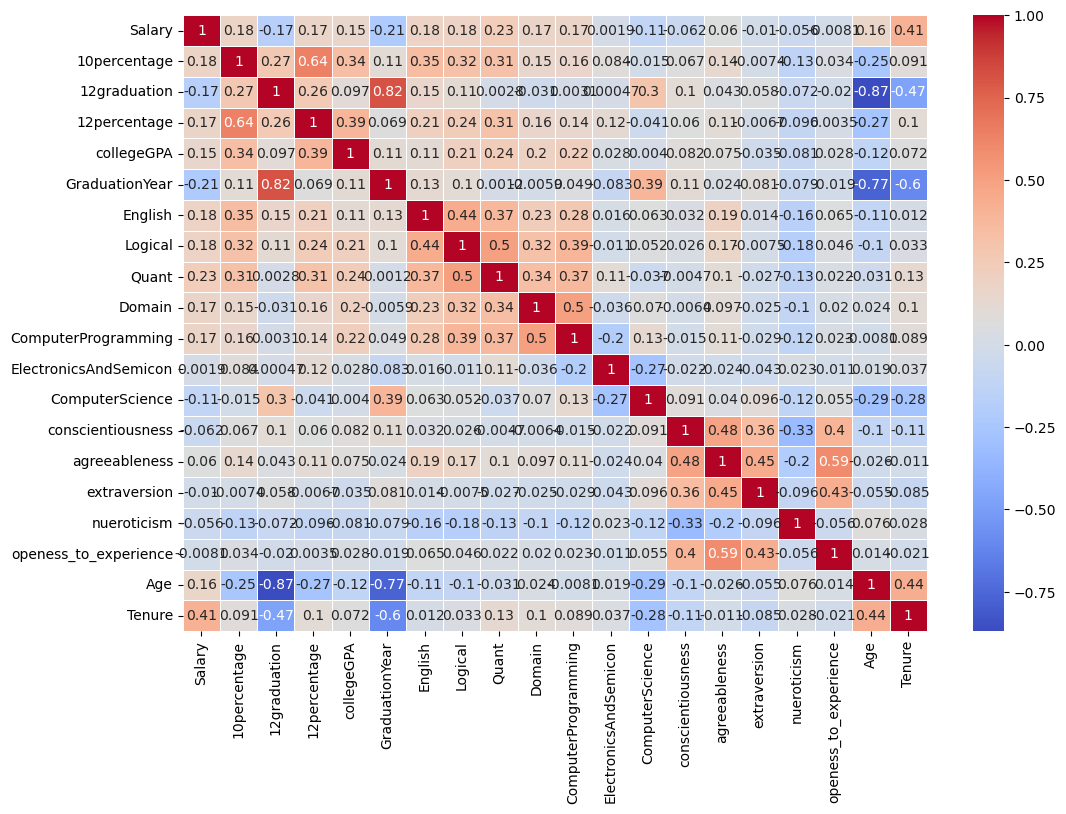

In [85]:
#Correlation Heatmap: Visualize the correlation between numerical variables.
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### Salary Analysis 

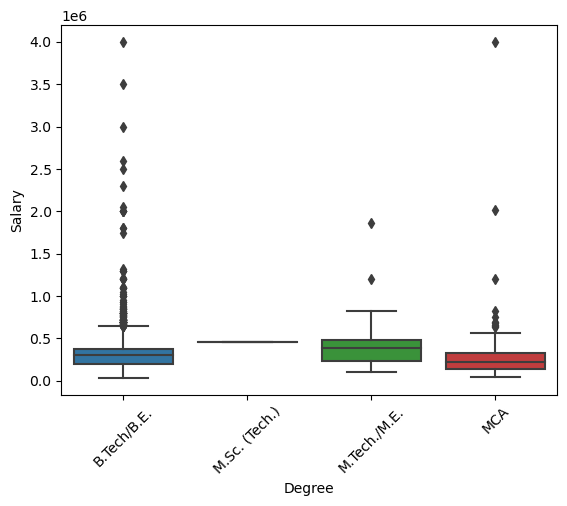

In [86]:
#Salary vs Degree:
sns.boxplot(x='Degree', y='Salary', data=df)
plt.xticks(rotation=45)
plt.show()

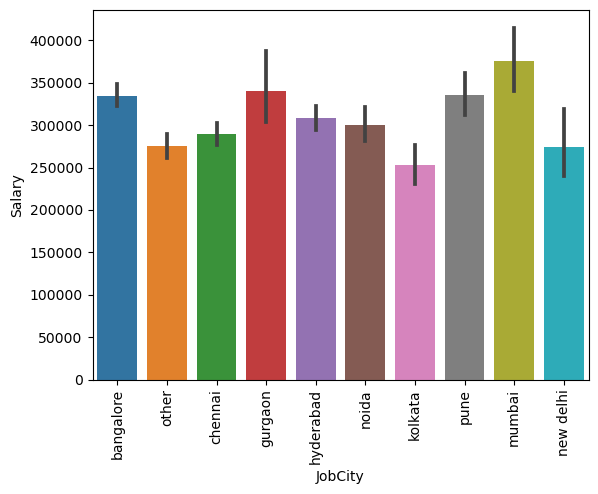

In [87]:
#Salary vs JobCity:

sns.barplot(x='JobCity', y='Salary', data=df)
plt.xticks(rotation=90)
plt.show()